In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for intractve graphs

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/DA_Assignment/input/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import nltk
from nltk.corpus import stopwords

In [0]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [0]:
train_data = pd.read_csv("../input/train.csv", header=0)
test_data = pd.read_csv("../input/test.csv", header=0)

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [0]:
train_data.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


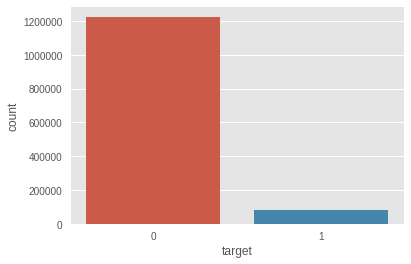

In [0]:
sns.countplot("target",data=train_data)

In [0]:
# now let us check in the number of Percentage
Count_Sincere_Questions = len(train_data[train_data["target"]==0]) 
Count_Insincere_Questions = len(train_data[train_data["target"]==1]) 
Percentage_of_Sincere_Questions = Count_Sincere_Questions/(Count_Sincere_Questions+Count_Insincere_Questions)
print("percentage of Sincere Questions is",Percentage_of_Sincere_Questions*100)
Percentage_of_Insincere_Questions= Count_Insincere_Questions/(Count_Sincere_Questions+Count_Insincere_Questions)
print("percentage of Insincere Questions",Percentage_of_Insincere_Questions*100)

percentage of Sincere Questions is 93.81298224821265
percentage of Insincere Questions 6.187017751787352


In [0]:
train_data['word_count'] = train_data['question_text'].apply(lambda x: len(str(x).split(" ")))
train_data[['question_text','word_count']].head()


,question_text,word_count
0,How did Quebec nationalists see their province...,13
1,"Do you have an adopted dog, how would you enco...",16
2,Why does velocity affect time? Does velocity a...,10
3,How did Otto von Guericke used the Magdeburg h...,9
4,Can I convert montra helicon D to a mountain b...,15


In [0]:
test_data['word_count'] = test_data['question_text'].apply(lambda x: len(str(x).split(" ")))
test_data[['question_text','word_count']].head()

,question_text,word_count
0,Why do so many women become so rude and arroga...,21
1,When should I apply for RV college of engineer...,30
2,What is it really like to be a nurse practitio...,10
3,Who are entrepreneurs?,3
4,Is education really making good people nowadays?,7


In [0]:
train_data['char_count'] = train_data['question_text'].str.len() ## this also includes spaces
train_data[['question_text','char_count']].head()

,question_text,char_count
0,How did Quebec nationalists see their province...,72
1,"Do you have an adopted dog, how would you enco...",81
2,Why does velocity affect time? Does velocity a...,67
3,How did Otto von Guericke used the Magdeburg h...,57
4,Can I convert montra helicon D to a mountain b...,77


In [0]:
test_data['char_count'] = test_data['question_text'].str.len() ## this also includes spaces
test_data[['question_text','char_count']].head()

,question_text,char_count
0,Why do so many women become so rude and arroga...,101
1,When should I apply for RV college of engineer...,162
2,What is it really like to be a nurse practitio...,50
3,Who are entrepreneurs?,22
4,Is education really making good people nowadays?,48


In [0]:
train_data['question_text'] = train_data['question_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_data['question_text'].head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog, how would you enco...
2    why does velocity affect time? does velocity a...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [0]:
test_data['question_text'] = test_data['question_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_data['question_text'].head()

0    why do so many women become so rude and arroga...
1    when should i apply for rv college of engineer...
2    what is it really like to be a nurse practitio...
3                               who are entrepreneurs?
4     is education really making good people nowadays?
Name: question_text, dtype: object

In [0]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [0]:
train_data['question_text'] = train_data['question_text'].str.replace('[^\w\s]','')
train_data['question_text'].head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog how would you encou...
2    why does velocity affect time does velocity af...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [0]:
test_data['question_text'] = test_data['question_text'].str.replace('[^\w\s]','')
test_data['question_text'].head()

0    why do so many women become so rude and arroga...
1    when should i apply for rv college of engineer...
2    what is it really like to be a nurse practitioner
3                                who are entrepreneurs
4      is education really making good people nowadays
Name: question_text, dtype: object

In [0]:
train_data['question_text'] = train_data['question_text'].str.replace('[^\w\s]','')
train_data['question_text'].head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog how would you encou...
2    why does velocity affect time does velocity af...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [0]:

test_data['question_text'] = test_data['question_text'].str.replace('[^\w\s]','')
test_data['question_text'].head()

0    why do so many women become so rude and arroga...
1    when should i apply for rv college of engineer...
2    what is it really like to be a nurse practitioner
3                                who are entrepreneurs
4      is education really making good people nowadays
Name: question_text, dtype: object

In [0]:
freq = pd.Series(' '.join(train_data['question_text']).split()).value_counts()[-20:]
freq
freq = list(freq.index)
train_data['question_text'] = train_data['question_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train_data['question_text'].head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog how would you encou...
2    why does velocity affect time does velocity af...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [0]:
from textblob import TextBlob
train_data['question_text'][:5].apply(lambda x: str(TextBlob(x).correct()))
test_data['question_text'][:5].apply(lambda x: str(TextBlob(x).correct()))#

0    why do so many women become so rude and arroga...
1    when should i apply for re college of engineer...
2    what is it really like to be a nurse practitioner
3                                who are entrepreneurs
4      is education really making good people nowadays
Name: question_text, dtype: object

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from textblob import Word
train_data['question_text'] = train_data['question_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train_data['question_text'].head()

0    how did quebec nationalist see their province ...
1    do you have an adopted dog how would you encou...
2    why doe velocity affect time doe velocity affe...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [0]:
test_data['question_text'] = test_data['question_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_data['question_text'].head()

0    why do so many woman become so rude and arroga...
1    when should i apply for rv college of engineer...
2    what is it really like to be a nurse practitioner
3                                 who are entrepreneur
4      is education really making good people nowadays
Name: question_text, dtype: object

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [0]:
test_data['question_text'] = test_data['question_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_data['question_text'].head()

0    many woman become rude arrogant get little bit...
1    apply rv college engineering bm college engine...
2                       really like nurse practitioner
3                                         entrepreneur
4         education really making good people nowadays
Name: question_text, dtype: object

In [0]:
test_data.head()

,qid,question_text,word_count,char_count
0,0000163e3ea7c7a74cd7,many woman become rude arrogant get little bit...,21,101
1,00002bd4fb5d505b9161,apply rv college engineering bm college engine...,30,162
2,00007756b4a147d2b0b3,really like nurse practitioner,10,50
3,000086e4b7e1c7146103,entrepreneur,3,22
4,0000c4c3fbe8785a3090,education really making good people nowadays,7,48


In [0]:
train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

In [0]:
#fit and transform

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(all_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)

train_text_features_cv = count_vectorizer.transform(train_text)
test_text_features_cv = count_vectorizer.transform(test_text)

train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)

In [0]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018)
test_preds1 = 0
oof_preds1 = np.zeros([train_data.shape[0],])
test_preds2 = 0
oof_preds2 = np.zeros([train_data.shape[0],])


for i, (train_idx, valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features_cv[train_idx,:],train_text_features_cv[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier1 = MultinomialNB()
    classifier2 = BernoulliNB()
    print('fitting.......')
    classifier1.fit(x_train,y_train)
    classifier2.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    
    oof_preds1[valid_idx] = classifier1.predict_proba(x_valid)[:,1]
    test_preds1 += 0.2*classifier1.predict_proba(test_text_features_cv)[:,1]
    oof_preds2[valid_idx] = classifier2.predict_proba(x_valid)[:,1]
    test_preds2 += 0.2*classifier2.predict_proba(test_text_features_cv)[:,1]

fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......




In [0]:
pred_train = (oof_preds1 > .3).astype(np.int)
f1_score(train_target, pred_train)

0.536209852499065

In [0]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

cm = confusion_matrix(train_target,pred_train)


In [0]:
cm

array([[1155427,   69885],
       [  25608,   55202]])

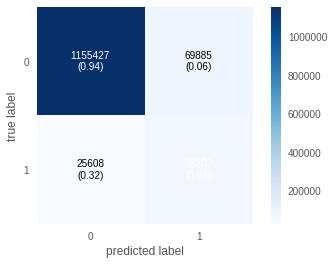

In [0]:
binary = np.array(cm)
ax = plot_confusion_matrix(conf_mat=binary,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [0]:
pred_train = (oof_preds2 > .3).astype(np.int)
f1_score(train_target, pred_train)

0.5156903477499022

In [0]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

cm = confusion_matrix(train_target,pred_train)



In [0]:
cm

array([[1171435,   53877],
       [  34016,   46794]])

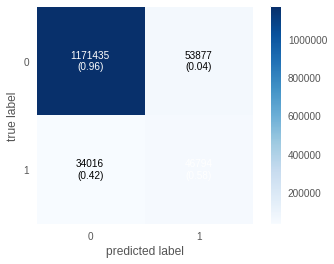

In [0]:
binary = np.array(cm)
ax = plot_confusion_matrix(conf_mat=binary,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()